In [1]:
from trueskill import *
import pandas as pd

In [2]:
def sort_ranks(d):
    return sorted(d.items(), key=operator.itemgetter(1))

In [3]:
# need ids
#ids = [1,4,12,13,22,35,46,104,158]
#ids = [0,1,2,4,5,6,12,16,19, 22]
ids = [0,1,2,4,5,6,12,16,19, 22,23,42,46,109,121,353,706,1494]

# need to read id pairs and selection from a file
#data = pd.read_csv('motionDatasetSpeedGaitTimeSyntheticHappy.csv', lineterminator='\n')
#data = pd.read_csv('syntheticExperiments\\motionDatasetBodyAngleSpeedSyntheticHappy.csv', lineterminator='\n')
data = pd.read_csv('syntheticExperiments\\motionDatasetBodyAngleSpeedSyntheticHappy_moreData.csv', lineterminator='\n')
data.rename(columns={"FFPType\r": "FFPType"},inplace=True)

In [4]:
# combinedMetric = data["speed"]/data["gaitDuration"]
# combined_df = pd.DataFrame(combinedMetric,data.index, columns =["combined"])
# combined_df

combinedMetric = data["speed"].apply(lambda x: pow(x,2)) - data["bodyAngleZ"].apply(lambda x: pow(x,3))
combined_df = pd.DataFrame(combinedMetric,data.index, columns =["combined"])
combined_df

combined
0   0.180036
1   0.082638
2  -0.067480
3   0.052372
4   0.227551
5   0.091484
6   0.009288
7   0.084092
8   0.143335
9   0.004763
10 -0.052695
11  0.025739
12  0.121333
13  0.042109
14  0.216833
15 -0.016799
16  0.091093
17  0.121267

In [5]:
data_all = pd.concat([data, combined_df], axis = 1,join_axes=[data.index])

In [6]:
data_all

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  \
0      0          shot0           shot0           0    0.092845   
1      1          shot1           shot1           0   -0.341507   
2      2          shot2           shot2           0    0.415263   
3      4          shot4           shot4           0   -0.066477   
4      5          shot5           shot5           0   -0.468007   
5      6          shot6           shot6           0    0.286784   
6     12         shot12          shot12           0   -0.181402   
7     16         shot16          shot16           0    0.467388   
8     19         shot19          shot19           0   -0.133653   
9     22         shot22          shot22           0    0.069941   
10    23         shot23          shot23           0    0.475102   
11    42         shot42          shot42           0    0.236943   
12    46         shot46          shot46           0   -0.491243   
13   109        shot109         shot109           0   -0.288606   
14   121        shot121         shot121           0   -0.292741   
15   353        shot353         shot353           0    0.259731   
16   706        shot706         shot706           0    0.085505   
17  1494       shot1494        shot1494           0   -0.133979   

    frontKneesAngle  rearKneesAngle  frontAnkle  rearAnkle  frontHipsAngle  \
0          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
1          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
2          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
3          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
4          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
5          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
6          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
7          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
8          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
9          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
10         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
11         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
12         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
13         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
14         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
15         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
16         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
17         0.927295        0.927295   -0.927295  -0.927295       -0.394791   

      ...     legAsymmetry  avgSwFtHt  avgBodyHt  frontMotionAsymmetry  \
0     ...         0.783124      0.008   0.208369              0.000012   
1     ...         1.641970      0.008   0.203807              0.000070   
2     ...         2.963181      0.008   0.199075              0.000010   
3     ...         0.218778      0.008   0.222955              0.000014   
4     ...         1.202180      0.008   0.187047              0.000012   
5     ...         1.377709      0.008   0.201977              0.000010   
6     ...         1.808725      0.008   0.223183              0.000032   
7     ...         1.549075      0.008   0.179023              0.000755   
8     ...         0.128473      0.008   0.211730              0.000005   
9     ...         0.416791      0.008   0.230101              0.000015   
10    ...         1.791466      0.008   0.189391              0.000009   
11    ...         1.594290      0.008   0.213155              0.000008   
12    ...         2.700787      0.008   0.190848              0.000190   
13    ...         2.114019      0.008   0.210505              0.000180   
14    ...         0.580758      0.008   0.197560              0.000018   
15    ...         2.400119      0.008   0.218472              0.0

In [7]:
# create a rating dataframe..
automatedRating_df = pd.DataFrame(columns=['activeSelection','id1','id2'])
count = 0
for index,i in enumerate(ids):
    #print(index,i)
    for j in ids[index:]:
        if(i!=j):
            #print (i,j)
            if(data_all.loc[data_all['id'] == i, 'combined'].iloc[0] > data_all.loc[data_all['id'] == j, 'combined'].iloc[0]):
                automatedRating_df.loc[count]=[1,i,j]
            else:
                automatedRating_df.loc[count]=[2,i,j]
            count = count + 1
automatedRating_df

activeSelection  id1   id2
0                 1    0     1
1                 1    0     2
2                 1    0     4
3                 2    0     5
4                 1    0     6
5                 1    0    12
6                 1    0    16
7                 1    0    19
8                 1    0    22
9                 1    0    23
10                1    0    42
11                1    0    46
12                1    0   109
13                2    0   121
14                1    0   353
15                1    0   706
16                1    0  1494
17                1    1     2
18                1    1     4
19                2    1     5
20                2    1     6
21                1    1    12
22                2    1    16
23                2    1    19
24                1    1    22
25                1    1    23
26                1    1    42
27                2    1    46
28                1    1   109
29                2    1   121
..              ...  ...   ...
123               2   22   706
124               2   22  1494
125               2   23    42
126               2   23    46
127               2   23   109
128               2   23   121
129               2   23   353
130               2   23   706
131               2   23  1494
132               2   42    46
133               2   42   109
134               2   42   121
135               1   42   353
136               2   42   706
137               2   42  1494
138               1   46   109
139               2   46   121
140               1   46   353
141               1   46   706
142               1   46  1494
143               2  109   121
144               1  109   353
145               2  109   706
146               2  109  1494
147               1  121   353
148               1  121   706
149               1  121  1494
150               2  353   706
151               2  353  1494
152               2  706  1494

[153 rows x 3 columns]

In [8]:
#sub_df = pd.read_csv('syntheticDataSpeedGaitTimeHappyRankings.csv', lineterminator='\n')
# sub_df = pd.read_csv('syntheticExperiments\\syntheticDataBodyAngleSpeedHappyRankings.csv', lineterminator='\n')
# sub_df.rename(columns={"id2\r": "id2"},inplace=True)

sub_df = automatedRating_df

In [9]:
def ts_result(id1, id2, ratings, drawn):
    new_id1, new_id2 = rate_1vs1(ratings[id1], ratings[id2], drawn)
    ratings[id1] = new_id1
    ratings[id2] = new_id2

In [10]:
# initialize ratings
designs = ids
ts_ratings = {d:Rating() for d in designs}
ts_ratings

{0: trueskill.Rating(mu=25.000, sigma=8.333),
 1: trueskill.Rating(mu=25.000, sigma=8.333),
 2: trueskill.Rating(mu=25.000, sigma=8.333),
 4: trueskill.Rating(mu=25.000, sigma=8.333),
 5: trueskill.Rating(mu=25.000, sigma=8.333),
 6: trueskill.Rating(mu=25.000, sigma=8.333),
 12: trueskill.Rating(mu=25.000, sigma=8.333),
 16: trueskill.Rating(mu=25.000, sigma=8.333),
 19: trueskill.Rating(mu=25.000, sigma=8.333),
 22: trueskill.Rating(mu=25.000, sigma=8.333),
 23: trueskill.Rating(mu=25.000, sigma=8.333),
 42: trueskill.Rating(mu=25.000, sigma=8.333),
 46: trueskill.Rating(mu=25.000, sigma=8.333),
 109: trueskill.Rating(mu=25.000, sigma=8.333),
 121: trueskill.Rating(mu=25.000, sigma=8.333),
 353: trueskill.Rating(mu=25.000, sigma=8.333),
 706: trueskill.Rating(mu=25.000, sigma=8.333),
 1494: trueskill.Rating(mu=25.000, sigma=8.333)}

In [11]:
# then, we go through each of the comparisons and add them to the model
for i, row in sub_df.iterrows():
    #print(row)
    if row.activeSelection == 0: # draw
        ts_result(row.id1, row.id2, ts_ratings, drawn=True)
    elif row.activeSelection == 1: # id1 wins
        ts_result(row.id1, row.id2, ts_ratings, drawn=False)
    elif row.activeSelection == 2: # id2 wins
        ts_result(row.id2, row.id1, ts_ratings, drawn=False)
        
#ranks = ranking_ts_dict(ts_ratings) # rank is sorting based on score..

In [12]:
ts_ratings

{0: trueskill.Rating(mu=35.666, sigma=3.350),
 1: trueskill.Rating(mu=23.150, sigma=2.791),
 2: trueskill.Rating(mu=8.131, sigma=3.524),
 4: trueskill.Rating(mu=22.982, sigma=2.739),
 5: trueskill.Rating(mu=41.811, sigma=3.590),
 6: trueskill.Rating(mu=28.304, sigma=2.713),
 12: trueskill.Rating(mu=16.891, sigma=2.792),
 16: trueskill.Rating(mu=25.197, sigma=2.734),
 19: trueskill.Rating(mu=34.733, sigma=2.860),
 22: trueskill.Rating(mu=14.662, sigma=2.863),
 23: trueskill.Rating(mu=10.497, sigma=2.998),
 42: trueskill.Rating(mu=18.917, sigma=2.756),
 46: trueskill.Rating(mu=33.111, sigma=2.786),
 109: trueskill.Rating(mu=20.561, sigma=2.739),
 121: trueskill.Rating(mu=39.577, sigma=3.259),
 353: trueskill.Rating(mu=12.631, sigma=2.922),
 706: trueskill.Rating(mu=27.358, sigma=2.669),
 1494: trueskill.Rating(mu=31.128, sigma=2.792)}

In [13]:
# looping over the dimensions
rankings = {}
raw_values = {}

#rankings = ranks
raw_values = ts_ratings

# We'd like to have some sort of DF which has all the summary values for each of the designs
design_df = pd.DataFrame()
design_df['id'] = ids
design_df = design_df.set_index(['id'])

e = "happy"

#design_df[e + "_rank"] = design_df.index.to_series().map(rankings[e])
design_df[e + "_ts"] = design_df.index.to_series().map(raw_values)
design_df[e + "_score"] = design_df[e + "_ts"].apply(lambda x: expose(x))
design_df[e + "_mu"] = design_df[e + "_ts"].apply(lambda x: x.mu)
design_df[e + "_sigma"] = design_df[e + "_ts"].apply(lambda x: x.sigma)
design_df["id"] = ids

In [14]:
design_df

happy_ts  happy_score   happy_mu  \
id                                                                       
0     trueskill.Rating(mu=35.666, sigma=3.350)    25.615096  35.666337   
1     trueskill.Rating(mu=23.150, sigma=2.791)    14.776211  23.150203   
2      trueskill.Rating(mu=8.131, sigma=3.524)    -2.441829   8.131188   
4     trueskill.Rating(mu=22.982, sigma=2.739)    14.765257  22.982249   
5     trueskill.Rating(mu=41.811, sigma=3.590)    31.041145  41.810784   
6     trueskill.Rating(mu=28.304, sigma=2.713)    20.165920  28.304206   
12    trueskill.Rating(mu=16.891, sigma=2.792)     8.515333  16.890918   
16    trueskill.Rating(mu=25.197, sigma=2.734)    16.996018  25.197258   
19    trueskill.Rating(mu=34.733, sigma=2.860)    26.152625  34.733481   
22    trueskill.Rating(mu=14.662, sigma=2.863)     6.071562  14.661832   
23    trueskill.Rating(mu=10.497, sigma=2.998)     1.504782  10.497490   
42    trueskill.Rating(mu=18.917, sigma=2.756)    10.649646  18.917300   
46    trueskill.Rating(mu=33.111, sigma=2.786)    24.753211  33.110671   
109   trueskill.Rating(mu=20.561, sigma=2.739)    12.342849  20.560744   
121   trueskill.Rating(mu=39.577, sigma=3.259)    29.799394  39.576912   
353   trueskill.Rating(mu=12.631, sigma=2.922)     3.864768  12.631153   
706   trueskill.Rating(mu=27.358, sigma=2.669)    19.350707  27.358320   
1494  trueskill.Rating(mu=31.128, sigma=2.792)    22.751566  31.128013   

      happy_sigma    id  
id                       
0        3.350413     0  
1        2.791331     1  
2        3.524339     2  
4        2.738998     4  
5        3.589880     5  
6        2.712762     6  
12       2.791862    12  
16       2.733747    16  
19       2.860285    19  
22       2.863424    22  
23       2.997569    23  
42       2.755885    42  
46       2.785820    46  
109      2.739299   109  
121      3.259172   121  
353      2.922128   353  
706      2.669204   706  
1494     2.792149  1494

In [15]:
#sorted_ranks = sort_ranks(rankings)

In [16]:
data

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  \
0      0          shot0           shot0           0    0.092845   
1      1          shot1           shot1           0   -0.341507   
2      2          shot2           shot2           0    0.415263   
3      4          shot4           shot4           0   -0.066477   
4      5          shot5           shot5           0   -0.468007   
5      6          shot6           shot6           0    0.286784   
6     12         shot12          shot12           0   -0.181402   
7     16         shot16          shot16           0    0.467388   
8     19         shot19          shot19           0   -0.133653   
9     22         shot22          shot22           0    0.069941   
10    23         shot23          shot23           0    0.475102   
11    42         shot42          shot42           0    0.236943   
12    46         shot46          shot46           0   -0.491243   
13   109        shot109         shot109           0   -0.288606   
14   121        shot121         shot121           0   -0.292741   
15   353        shot353         shot353           0    0.259731   
16   706        shot706         shot706           0    0.085505   
17  1494       shot1494        shot1494           0   -0.133979   

    frontKneesAngle  rearKneesAngle  frontAnkle  rearAnkle  frontHipsAngle  \
0          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
1          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
2          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
3          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
4          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
5          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
6          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
7          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
8          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
9          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
10         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
11         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
12         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
13         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
14         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
15         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
16         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
17         0.927295        0.927295   -0.927295  -0.927295       -0.394791   

     ...     rearLegSpread  legAsymmetry  avgSwFtHt  avgBodyHt  \
0    ...          4.810556      0.783124      0.008   0.208369   
1    ...          6.745907      1.641970      0.008   0.203807   
2    ...          4.171249      2.963181      0.008   0.199075   
3    ...          4.662912      0.218778      0.008   0.222955   
4    ...          7.281955      1.202180      0.008   0.187047   
5    ...          5.139855      1.377709      0.008   0.201977   
6    ...          5.418506      1.808725      0.008   0.223183   
7    ...          5.796372      1.549075      0.008   0.179023   
8    ...          5.252040      0.128473      0.008   0.211730   
9    ...          3.815949      0.416791      0.008   0.230101   
10   ...          5.705673      1.791466      0.008   0.189391   
11   ...          4.407603      1.594290      0.008   0.213155   
12   ...          7.618707      2.700787      0.008   0.190848   
13   ...          6.357108      2.114019      0.008   0.210505   
14   ...          6.172993      0.580758      0.008   0.197560   
15   ...          3.529163      2.400119      0.008   0.218472   
16   ...          4.535352      0.573132      0.008   0.217694   
17   ...          4.836053      1.395352      0.008   0.21465

In [17]:
#data["speed"]

In [18]:
#data["gaitDuration"]

In [19]:
dataSorted = data_all.sort_values("combined", ascending=True, inplace = False)

In [20]:
dataSorted

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  \
2      2          shot2           shot2           0    0.415263   
10    23         shot23          shot23           0    0.475102   
15   353        shot353         shot353           0    0.259731   
9     22         shot22          shot22           0    0.069941   
6     12         shot12          shot12           0   -0.181402   
11    42         shot42          shot42           0    0.236943   
13   109        shot109         shot109           0   -0.288606   
3      4          shot4           shot4           0   -0.066477   
1      1          shot1           shot1           0   -0.341507   
7     16         shot16          shot16           0    0.467388   
16   706        shot706         shot706           0    0.085505   
5      6          shot6           shot6           0    0.286784   
17  1494       shot1494        shot1494           0   -0.133979   
12    46         shot46          shot46           0   -0.491243   
8     19         shot19          shot19           0   -0.133653   
0      0          shot0           shot0           0    0.092845   
14   121        shot121         shot121           0   -0.292741   
4      5          shot5           shot5           0   -0.468007   

    frontKneesAngle  rearKneesAngle  frontAnkle  rearAnkle  frontHipsAngle  \
2          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
10         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
15         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
9          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
6          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
11         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
13         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
3          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
1          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
7          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
16         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
5          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
17         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
12         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
8          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
0          0.927295        0.927295   -0.927295  -0.927295       -0.394791   
14         0.927295        0.927295   -0.927295  -0.927295       -0.394791   
4          0.927295        0.927295   -0.927295  -0.927295       -0.394791   

      ...     legAsymmetry  avgSwFtHt  avgBodyHt  frontMotionAsymmetry  \
2     ...         2.963181      0.008   0.199075              0.000010   
10    ...         1.791466      0.008   0.189391              0.000009   
15    ...         2.400119      0.008   0.218472              0.000000   
9     ...         0.416791      0.008   0.230101              0.000015   
6     ...         1.808725      0.008   0.223183              0.000032   
11    ...         1.594290      0.008   0.213155              0.000008   
13    ...         2.114019      0.008   0.210505              0.000180   
3     ...         0.218778      0.008   0.222955              0.000014   
1     ...         1.641970      0.008   0.203807              0.000070   
7     ...         1.549075      0.008   0.179023              0.000755   
16    ...         0.573132      0.008   0.217694              0.000014   
5     ...         1.377709      0.008   0.201977              0.000010   
17    ...         1.395352      0.008   0.214656              1.421850   
12    ...         2.700787      0.008   0.190848              0.000190   
8     ...         0.128473      0.008   0.211730              0.000005   
0     ...         0.783124      0.008   0.208369              0.0

In [21]:
scoreSorted = design_df.sort_values(["happy_score"], ascending = True)

In [22]:
scoreSorted

happy_ts  happy_score   happy_mu  \
id                                                                       
2      trueskill.Rating(mu=8.131, sigma=3.524)    -2.441829   8.131188   
23    trueskill.Rating(mu=10.497, sigma=2.998)     1.504782  10.497490   
353   trueskill.Rating(mu=12.631, sigma=2.922)     3.864768  12.631153   
22    trueskill.Rating(mu=14.662, sigma=2.863)     6.071562  14.661832   
12    trueskill.Rating(mu=16.891, sigma=2.792)     8.515333  16.890918   
42    trueskill.Rating(mu=18.917, sigma=2.756)    10.649646  18.917300   
109   trueskill.Rating(mu=20.561, sigma=2.739)    12.342849  20.560744   
4     trueskill.Rating(mu=22.982, sigma=2.739)    14.765257  22.982249   
1     trueskill.Rating(mu=23.150, sigma=2.791)    14.776211  23.150203   
16    trueskill.Rating(mu=25.197, sigma=2.734)    16.996018  25.197258   
706   trueskill.Rating(mu=27.358, sigma=2.669)    19.350707  27.358320   
6     trueskill.Rating(mu=28.304, sigma=2.713)    20.165920  28.304206   
1494  trueskill.Rating(mu=31.128, sigma=2.792)    22.751566  31.128013   
46    trueskill.Rating(mu=33.111, sigma=2.786)    24.753211  33.110671   
0     trueskill.Rating(mu=35.666, sigma=3.350)    25.615096  35.666337   
19    trueskill.Rating(mu=34.733, sigma=2.860)    26.152625  34.733481   
121   trueskill.Rating(mu=39.577, sigma=3.259)    29.799394  39.576912   
5     trueskill.Rating(mu=41.811, sigma=3.590)    31.041145  41.810784   

      happy_sigma    id  
id                       
2        3.524339     2  
23       2.997569    23  
353      2.922128   353  
22       2.863424    22  
12       2.791862    12  
42       2.755885    42  
109      2.739299   109  
4        2.738998     4  
1        2.791331     1  
16       2.733747    16  
706      2.669204   706  
6        2.712762     6  
1494     2.792149  1494  
46       2.785820    46  
0        3.350413     0  
19       2.860285    19  
121      3.259172   121  
5        3.589880     5

In [23]:
#dataSortedSpeed = data_all.sort_values("speed", ascending=True, inplace = False)

In [23]:
import matplotlib.pyplot as plt

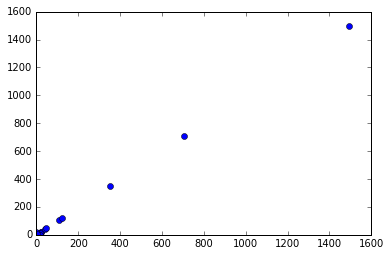

In [24]:
plt.plot(scoreSorted['id'], dataSorted['id'],'o')
plt.show()

In [25]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn_pandas import gen_features
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

regr = RandomForestRegressor(n_jobs=-1, random_state=0,n_estimators=10, warm_start = True, oob_score=True)
lr = LinearRegression()#(fit_intercept = False)

FEATURES = ["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration"]
FEATURESALL = ["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "FFPType"]

mapper = DataFrameMapper([(["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration"], preprocessing.StandardScaler()),(['FFPType'], preprocessing.OneHotEncoder())], input_df = True, sparse = True)

transformedData = mapper.fit_transform(data_all.copy())

In [27]:
regr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=0, verbose=0, warm_start=True)>

In [26]:
EMOSCORES = ["happy_mu", "sadder_mu", "angrier_mu"]
EMOCONFIDENCE_INV = ["happy_sigma", "sadder_sigma", "angrier_sigma"]
min_confidence = 25/3 # true skill base confidence: http://trueskill.org/
EMOWTS = ["happy_wt", "sadder_wt", "angrier_wt"]

In [27]:
emotionid =0

WTS= {'happy_wt':(1.0-(design_df[EMOCONFIDENCE_INV[0]]/min_confidence)).values}
WTS_df = pd.DataFrame(WTS,design_df.index)
scores_WTS = pd.concat([design_df, WTS_df], axis = 1)

In [28]:
A = data["speed"].apply(lambda x: pow(x,2)) 
B = data["bodyAngleZ"].apply(lambda x: pow(x,3))
A_df = pd.DataFrame(A.values,data.index, columns =['A'])
B_df = pd.DataFrame(B.values,data.index, columns =["B"])

data_allAB = pd.concat([data, A_df, B_df], axis = 1,join_axes=[data.index])

#mapperAB = DataFrameMapper([(["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "A", "B"], preprocessing.StandardScaler()),(['FFPType'], preprocessing.OneHotEncoder())], input_df = True, sparse = True)
mapperAB = DataFrameMapper([(["A", "B"], preprocessing.StandardScaler())], input_df = True, sparse = True)

transformedDataAB = mapperAB.fit_transform(data_allAB.copy())

X_trainAB, X_testAB, y_trainAB, y_testAB = model_selection.train_test_split(transformedDataAB, scores_WTS, test_size=0.3, random_state=42)

# hack to check RF with AB features.. where A = speed^2 and B = angle^3
#X_train, X_test, y_train, y_test = model_selection.train_test_split(transformedDataAB, scores_WTS, test_size=0.3, random_state=42)

In [29]:
scores_WTS

happy_ts  happy_score   happy_mu  \
id                                                                       
0     trueskill.Rating(mu=35.666, sigma=3.350)    25.615096  35.666337   
1     trueskill.Rating(mu=23.150, sigma=2.791)    14.776211  23.150203   
2      trueskill.Rating(mu=8.131, sigma=3.524)    -2.441829   8.131188   
4     trueskill.Rating(mu=22.982, sigma=2.739)    14.765257  22.982249   
5     trueskill.Rating(mu=41.811, sigma=3.590)    31.041145  41.810784   
6     trueskill.Rating(mu=28.304, sigma=2.713)    20.165920  28.304206   
12    trueskill.Rating(mu=16.891, sigma=2.792)     8.515333  16.890918   
16    trueskill.Rating(mu=25.197, sigma=2.734)    16.996018  25.197258   
19    trueskill.Rating(mu=34.733, sigma=2.860)    26.152625  34.733481   
22    trueskill.Rating(mu=14.662, sigma=2.863)     6.071562  14.661832   
23    trueskill.Rating(mu=10.497, sigma=2.998)     1.504782  10.497490   
42    trueskill.Rating(mu=18.917, sigma=2.756)    10.649646  18.917300   
46    trueskill.Rating(mu=33.111, sigma=2.786)    24.753211  33.110671   
109   trueskill.Rating(mu=20.561, sigma=2.739)    12.342849  20.560744   
121   trueskill.Rating(mu=39.577, sigma=3.259)    29.799394  39.576912   
353   trueskill.Rating(mu=12.631, sigma=2.922)     3.864768  12.631153   
706   trueskill.Rating(mu=27.358, sigma=2.669)    19.350707  27.358320   
1494  trueskill.Rating(mu=31.128, sigma=2.792)    22.751566  31.128013   

      happy_sigma    id  happy_wt  
id                                 
0        3.350413     0  0.597950  
1        2.791331     1  0.665040  
2        3.524339     2  0.577079  
4        2.738998     4  0.671320  
5        3.589880     5  0.569214  
6        2.712762     6  0.674469  
12       2.791862    12  0.664977  
16       2.733747    16  0.671950  
19       2.860285    19  0.656766  
22       2.863424    22  0.656389  
23       2.997569    23  0.640292  
42       2.755885    42  0.669294  
46       2.785820    46  0.665702  
109      2.739299   109  0.671284  
121      3.259172   121  0.608899  
353      2.922128   353  0.649345  
706      2.669204   706  0.679695  
1494     2.792149  1494  0.664942

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(transformedData, scores_WTS, test_size=0.3, random_state=42)

In [33]:
# use a full grid over all parameters
param_grid = {"max_depth": [3,5,8, None],
              "max_features": ["auto", "sqrt", "log2", None],#[3, 5, 10, 15]}#,
              #"min_samples_split" : [ 1,2,5,8],
              "min_samples_leaf" : [ 1,2,5],#}
             # "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# run grid search
grid_search = GridSearchCV(regr, param_grid=param_grid, cv=3, n_jobs = -1)
start = time()
grid_search.fit(X_train, y_train[EMOSCORES[emotionid]], sample_weight=y_train[EMOWTS[emotionid]])

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
print(grid_search.cv_results_)

GridSearchCV took 17.18 seconds for 96 candidate parameter settings.
{'mean_fit_time': array([ 0.11267304,  0.11333982,  0.12967404,  0.14067475,  0.12800725,
        0.15200877,  0.12434038,  0.14500825,  0.14334146,  0.13700779,
        0.14834181,  0.14134137,  0.13167413,  0.1543421 ,  0.14367493,
        0.13300753,  0.14167476,  0.1373411 ,  0.14567494,  0.13900789,
        0.13034074,  0.15700897,  0.13234083,  0.1326743 ,  0.12867403,
        0.1230069 ,  0.12300698,  0.12034019,  0.11867356,  0.12867411,
        0.11900679,  0.12434038,  0.12767402,  0.11834002,  0.12400699,
        0.12567377,  0.11567322,  0.1276741 ,  0.11800679,  0.11967349,
        0.12634055,  0.1176734 ,  0.13634109,  0.13367438,  0.13400769,
        0.12534054,  0.12100705,  0.12700733,  0.14334162,  0.11767356,
        0.12634055,  0.12534054,  0.12000696,  0.12467376,  0.12367376,
        0.11500669,  0.1193401 ,  0.1193401 ,  0.12367376,  0.11967349,
        0.11433999,  0.14834189,  0.1296742 ,  0.

In [34]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=0, verbose=0, warm_start=True)

In [35]:
grid_search.best_score_

-0.19332709416496147

In [36]:
ytest_pred=grid_search.best_estimator_.predict(X_test)
ytrain_pred=grid_search.best_estimator_.predict(X_train)

In [37]:
from scipy.stats import spearmanr

In [38]:
print("Mean squared error wtd (test): %.2f"
      % mean_squared_error( y_test[EMOSCORES[emotionid]],ytest_pred,sample_weight=y_test[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score wtd (test): %.4f' % r2_score( y_test[EMOSCORES[emotionid]],ytest_pred,sample_weight=y_test[EMOWTS[emotionid]]))
rho_grid, pval_grid = spearmanr(y_test[EMOSCORES[emotionid]],ytest_pred)
print('Spearman grid cv (test)-- rho: %.4f' % rho_grid, 'p-val: %.20f' % pval_grid)

Mean squared error wtd (test): 16.59
Variance score wtd (test): -0.0478
Spearman grid cv (test)-- rho: -0.5000 p-val: 0.66666666666666674068


In [39]:
print("Mean squared error wtd (train): %.2f"
      % mean_squared_error( y_train[EMOSCORES[emotionid]],ytrain_pred,sample_weight=y_train[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score wtd (train): %.2f' % r2_score( y_train[EMOSCORES[emotionid]],ytrain_pred,sample_weight=y_train[EMOWTS[emotionid]]))
rho_gridtr, pval_gridtr = spearmanr(y_train[EMOSCORES[emotionid]],ytrain_pred)
print('Spearman grid cv (train)-- rho: %.4f' % rho_gridtr, 'p-val: %.20f' % pval_gridtr)

Mean squared error wtd (train): 9.73
Variance score wtd (train): 0.90
Spearman grid cv (train)-- rho: 1.0000 p-val: 0.00000000000000000000


In [40]:
LABEL = EMOSCORES[emotionid]
predicted_name ="predicted_"+LABEL

In [41]:
y_hat_regr = pd.DataFrame(ytest_pred, columns=[predicted_name], index=y_test[LABEL].index) 

y_all_testregr = pd.concat([y_hat_regr, y_test[LABEL], y_test[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_testregr_sorted = y_all_testregr.sort_values(EMOSCORES[emotionid],ascending=[True])

ytrain_hat_regr = pd.DataFrame(ytrain_pred, columns=[predicted_name], index=y_train[LABEL].index) 

y_all_trainregr = pd.concat([ytrain_hat_regr, y_train[LABEL], y_train[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_trainregr_sorted = y_all_trainregr.sort_values(EMOSCORES[emotionid],ascending=[True])

Populating the interactive namespace from numpy and matplotlib


C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rate', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


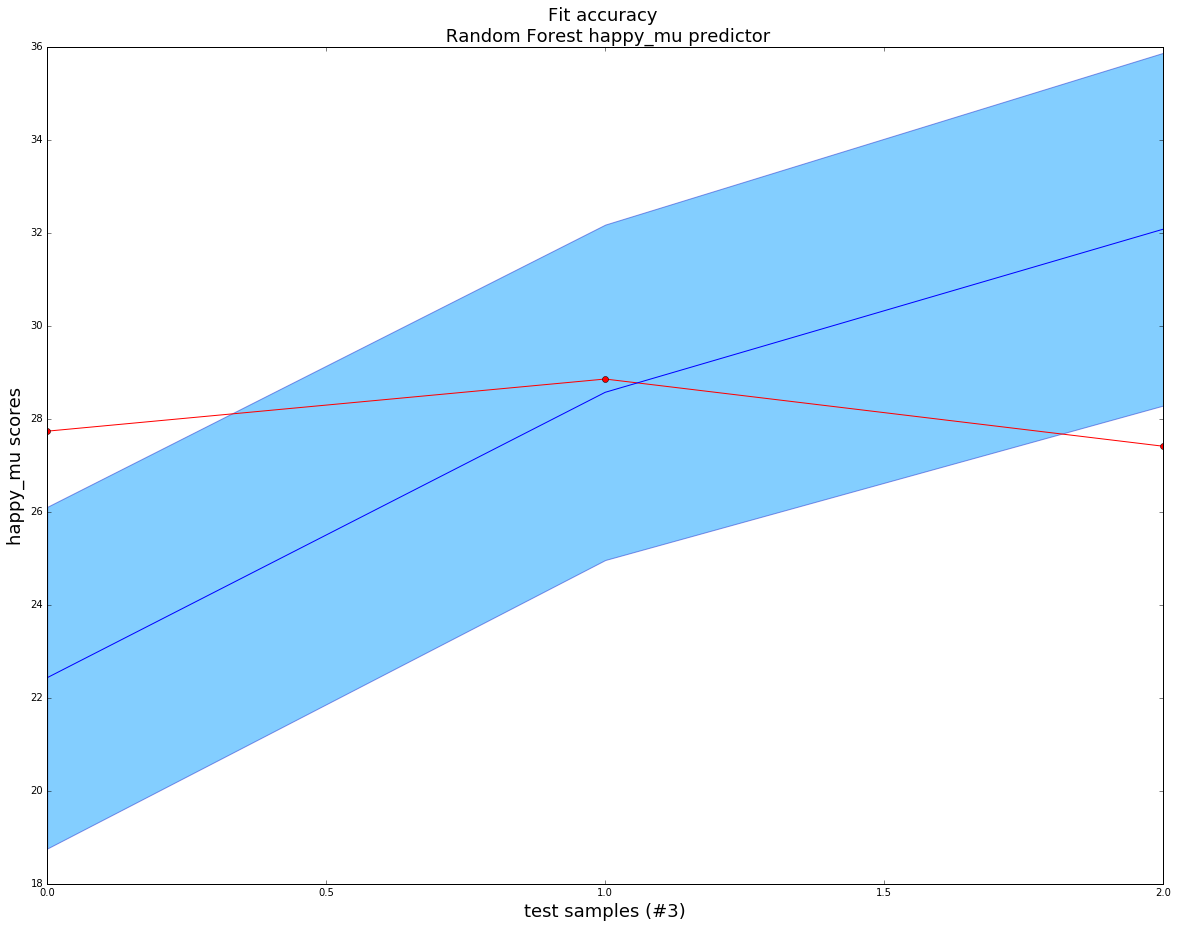

In [42]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_testregr_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_testregr_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_testregr_sorted[LABEL].values-y_all_testregr_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_testregr_sorted[LABEL].values+y_all_testregr_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_testregr_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Random Forest ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('test samples (#'+str(y_test[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

In [43]:
y_test

happy_ts  happy_score   happy_mu  \
id                                                                     
19  trueskill.Rating(mu=32.078, sigma=3.793)    20.699201  32.077697   
1   trueskill.Rating(mu=22.432, sigma=3.674)    11.411108  22.432474   
6   trueskill.Rating(mu=28.570, sigma=3.607)    17.749867  28.569875   

    happy_sigma  id  happy_wt  
id                             
19     3.792832  19  1.044860  
1      3.673789   1  1.059145  
6      3.606669   6  1.067200

In [44]:
ytest_pred

array([ 27.41008252,  27.73400615,  28.85541926])

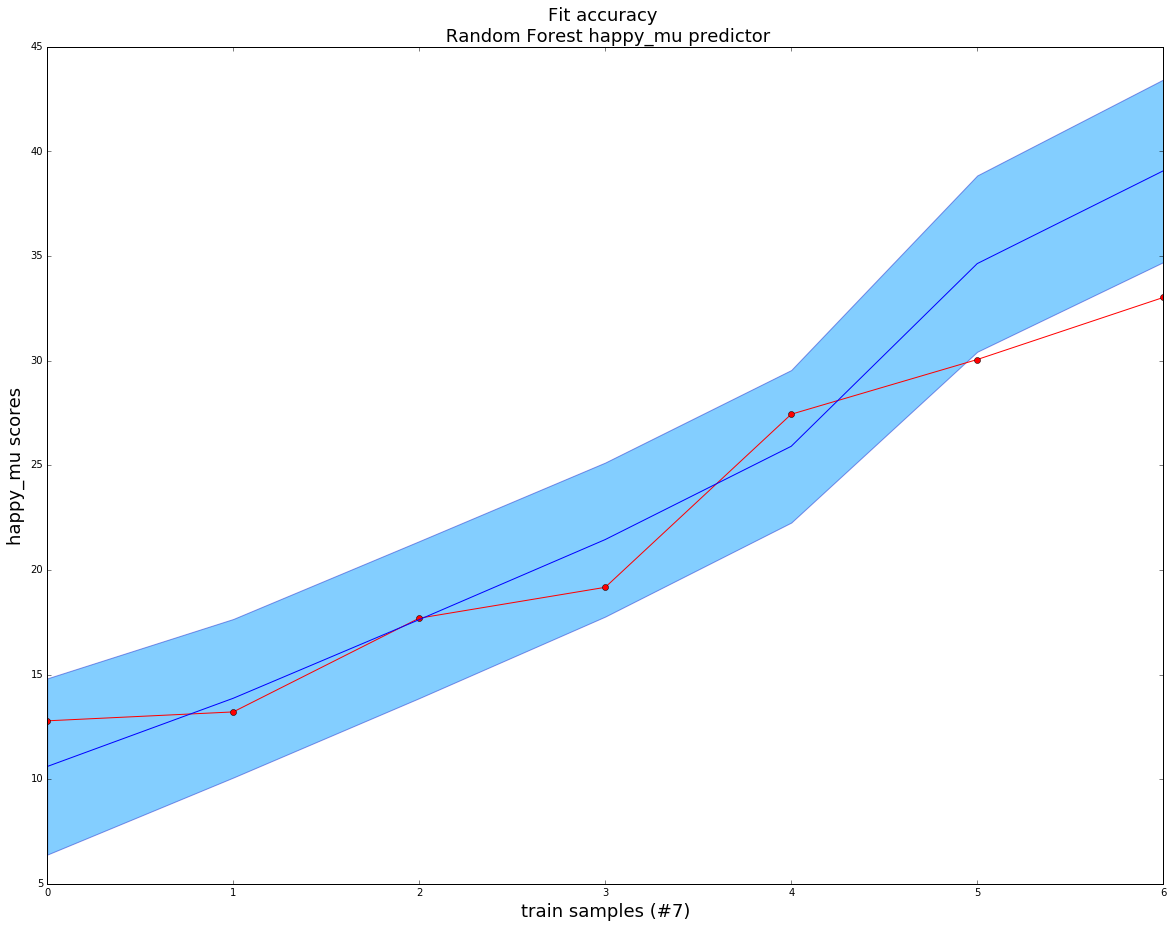

In [45]:
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_trainregr_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_trainregr_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_trainregr_sorted[LABEL].values-y_all_trainregr_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_trainregr_sorted[LABEL].values+y_all_trainregr_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_trainregr_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Random Forest ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('train samples (#'+str(y_train[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

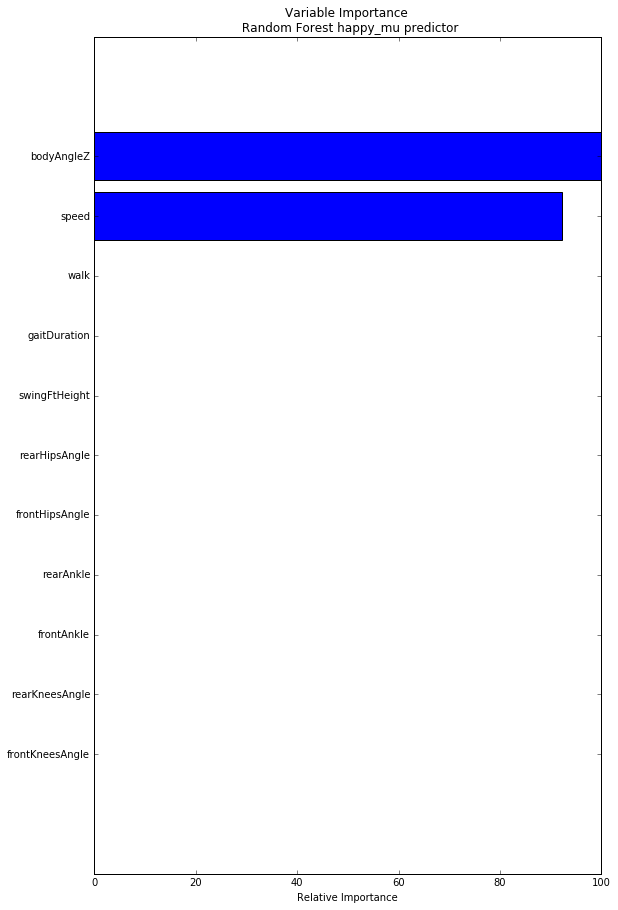

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# for AB features
#FEATURENAMES = np.array(["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "A", "B", "walk", "trot", "gallop", "dynamicWalk","walk2","walk2Longswing","walkLongswing"])
FEATURENAMES = np.array(["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "walk", "trot", "gallop", "dynamicWalk","walk2","walk2Longswing","walkLongswing"])
LABEL = EMOSCORES[emotionid]
# #############################################################################
# Plot feature importance
feature_importance = grid_search.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) 
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,FEATURENAMES[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance \n Random Forest ' + LABEL + ' predictor')
plt.show()

In [31]:
lr.fit(X_train, y_train[EMOSCORES[emotionid]],sample_weight=y_train[EMOWTS[emotionid]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#lrAB =  LassoCV(alphas=[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10],cv = 3)#LinearRegression()#LinearRegression(fit_intercept =False)
lrAB = LinearRegression()#LinearRegression(fit_intercept =False)
lrAB.fit(X_trainAB, y_trainAB[EMOSCORES[emotionid]])#,sample_weight=y_trainAB[EMOWTS[emotionid]])
ytest_pred_lrAB=lrAB.predict(X_testAB)
ytrain_pred_lrAB=lrAB.predict(X_trainAB)

In [33]:
ytest_pred_lr=lr.predict(X_test)
ytrain_pred_lr=lr.predict(X_train)

In [34]:
ytest_pred_lr

array([ 31.10183543,  31.98596249,  34.32633511,  22.78789182,
        26.37949173,  27.60316087])

In [35]:
ytest_pred_lrAB

array([ 36.48903051,  25.82447829,  32.37130583,  26.30417333,
        22.08359518,  21.11912372])

In [36]:
ytest_pred

NameError: name 'ytest_pred' is not defined

In [53]:
y_test

happy_ts  happy_score   happy_mu  \
id                                                                     
19  trueskill.Rating(mu=32.078, sigma=3.793)    20.699201  32.077697   
1   trueskill.Rating(mu=22.432, sigma=3.674)    11.411108  22.432474   
6   trueskill.Rating(mu=28.570, sigma=3.607)    17.749867  28.569875   

    happy_sigma  id  happy_wt  
id                             
19     3.792832  19  1.044860  
1      3.673789   1  1.059145  
6      3.606669   6  1.067200

In [45]:
print("Mean squared error LR wtd (test) AB: %.2f"
      % mean_squared_error( y_testAB[EMOSCORES[emotionid]],ytest_pred_lrAB,sample_weight=y_testAB[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score LR wtd (test) AB: %.4f' % r2_score( y_testAB[EMOSCORES[emotionid]],ytest_pred_lrAB,sample_weight=y_testAB[EMOWTS[emotionid]]))

Mean squared error LR wtd (test) AB: 3.12
Variance score LR wtd (test) AB: 0.9079


In [55]:
print("Mean squared error LR wtd (test): %.2f"
      % mean_squared_error( y_test[EMOSCORES[emotionid]],ytest_pred_lr,sample_weight=y_test[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score LR wtd (test): %.4f' % r2_score( y_test[EMOSCORES[emotionid]],ytest_pred_lr,sample_weight=y_test[EMOWTS[emotionid]]))

Mean squared error LR wtd (test): 15.14
Variance score LR wtd (test): 0.0442


In [46]:
print("Mean squared error wtd LR (train) AB: %.2f"
      % mean_squared_error( y_trainAB[EMOSCORES[emotionid]],ytrain_pred_lrAB,sample_weight=y_trainAB[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score wtd LR (train) AB: %.2f' % r2_score( y_trainAB[EMOSCORES[emotionid]],ytrain_pred_lrAB,sample_weight=y_trainAB[EMOWTS[emotionid]]))

Mean squared error wtd LR (train) AB: 1.52
Variance score wtd LR (train) AB: 0.99


In [57]:
print("Mean squared error wtd LR (train): %.2f"
      % mean_squared_error( y_train[EMOSCORES[emotionid]],ytrain_pred_lr,sample_weight=y_train[EMOWTS[emotionid]]))
# Explained variance score: 1 is perfect prediction
print('Variance score wtd LR (train): %.2f' % r2_score( y_train[EMOSCORES[emotionid]],ytrain_pred_lr,sample_weight=y_train[EMOWTS[emotionid]]))

Mean squared error wtd LR (train): 3.25
Variance score wtd LR (train): 0.97


In [58]:
y_hat_lr = pd.DataFrame(ytest_pred_lr, columns=[predicted_name], index=y_test[LABEL].index) 

y_all_testlr = pd.concat([y_hat_lr, y_test[LABEL], y_test[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_testlr_sorted = y_all_testlr.sort_values(EMOSCORES[emotionid],ascending=[True])

ytrain_hat_lr = pd.DataFrame(ytrain_pred_lr, columns=[predicted_name], index=y_train[LABEL].index) 

y_all_trainlr = pd.concat([ytrain_hat_lr, y_train[LABEL], y_train[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_trainlr_sorted = y_all_trainlr.sort_values(EMOSCORES[emotionid],ascending=[True])

In [41]:
y_hat_lrAB = pd.DataFrame(ytest_pred_lrAB, columns=[predicted_name], index=y_testAB[LABEL].index) 

y_all_testlrAB = pd.concat([y_hat_lrAB, y_testAB[LABEL], y_testAB[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_testlrAB_sorted = y_all_testlrAB.sort_values(EMOSCORES[emotionid],ascending=[True])

ytrain_hat_lrAB = pd.DataFrame(ytrain_pred_lrAB, columns=[predicted_name], index=y_trainAB[LABEL].index) 

y_all_trainlrAB = pd.concat([ytrain_hat_lrAB, y_trainAB[LABEL], y_trainAB[EMOCONFIDENCE_INV[emotionid]]], axis=1)

y_all_trainlrAB_sorted = y_all_trainlrAB.sort_values(EMOSCORES[emotionid],ascending=[True])

Populating the interactive namespace from numpy and matplotlib


C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


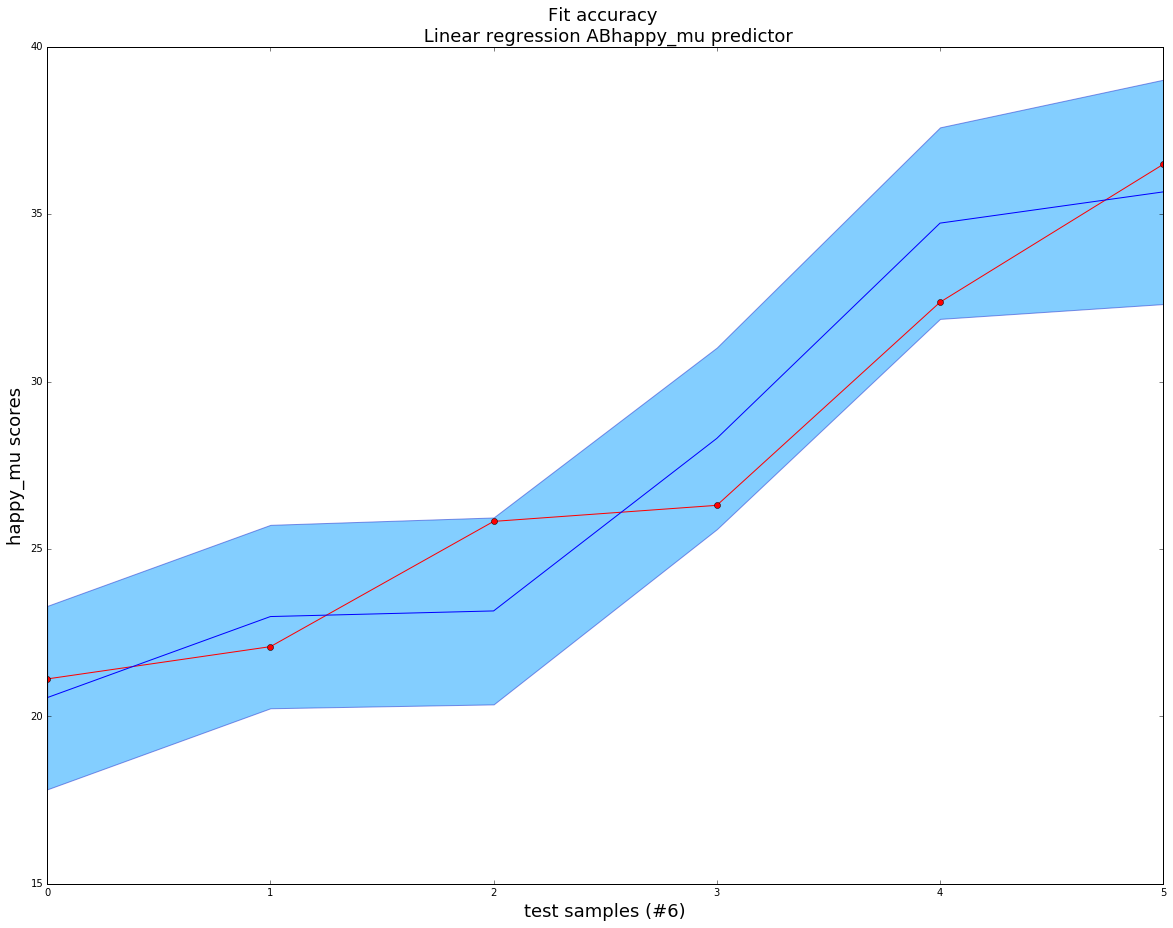

In [42]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_testlrAB_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_testlrAB_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_testlrAB_sorted[LABEL].values-y_all_testlrAB_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_testlrAB_sorted[LABEL].values+y_all_testlrAB_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_testlrAB_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression AB' + LABEL + ' predictor',fontsize=18)
plt.xlabel('test samples (#'+str(y_testAB[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

Populating the interactive namespace from numpy and matplotlib


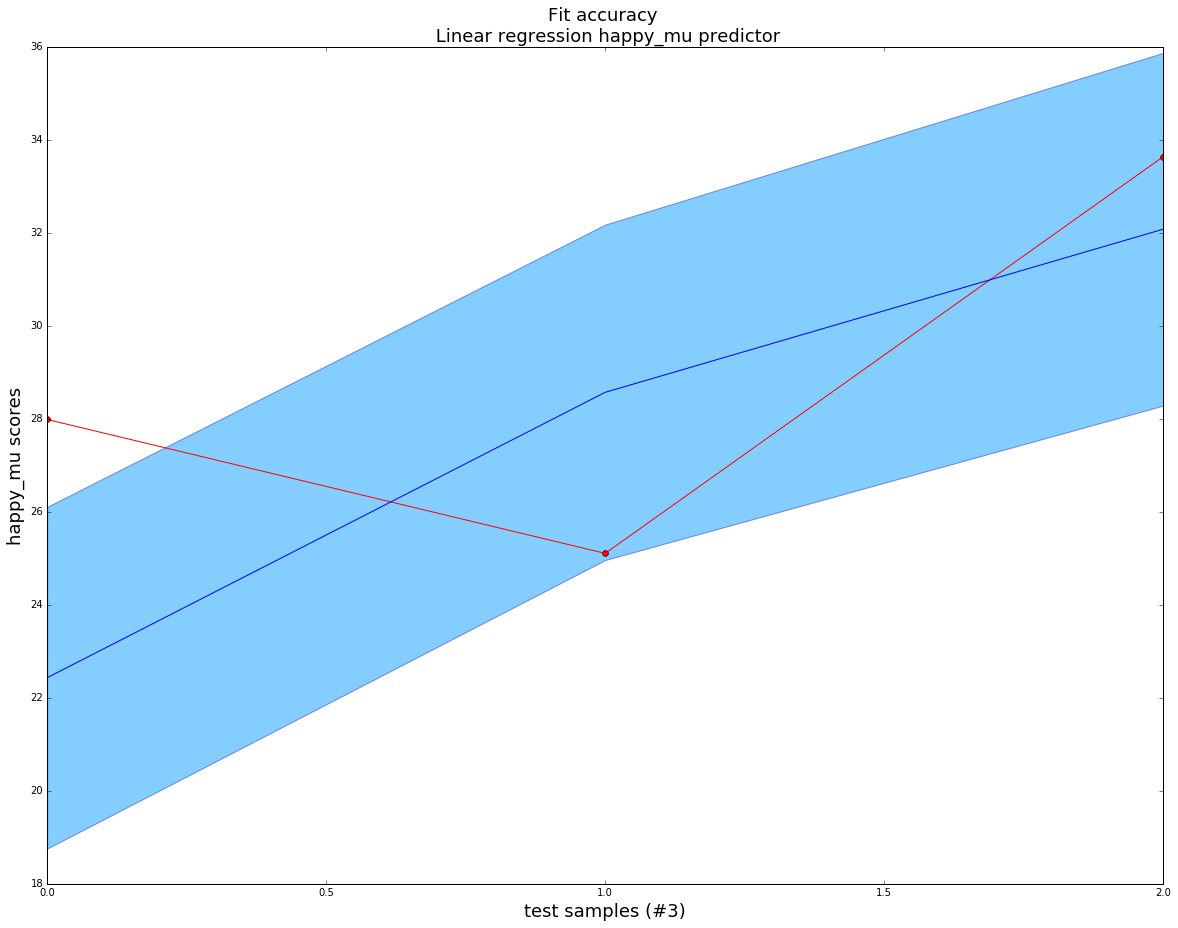

In [61]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_testlr_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_testlr_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_testlr_sorted[LABEL].values-y_all_testlr_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_testlr_sorted[LABEL].values+y_all_testlr_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_testlr_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('test samples (#'+str(y_test[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

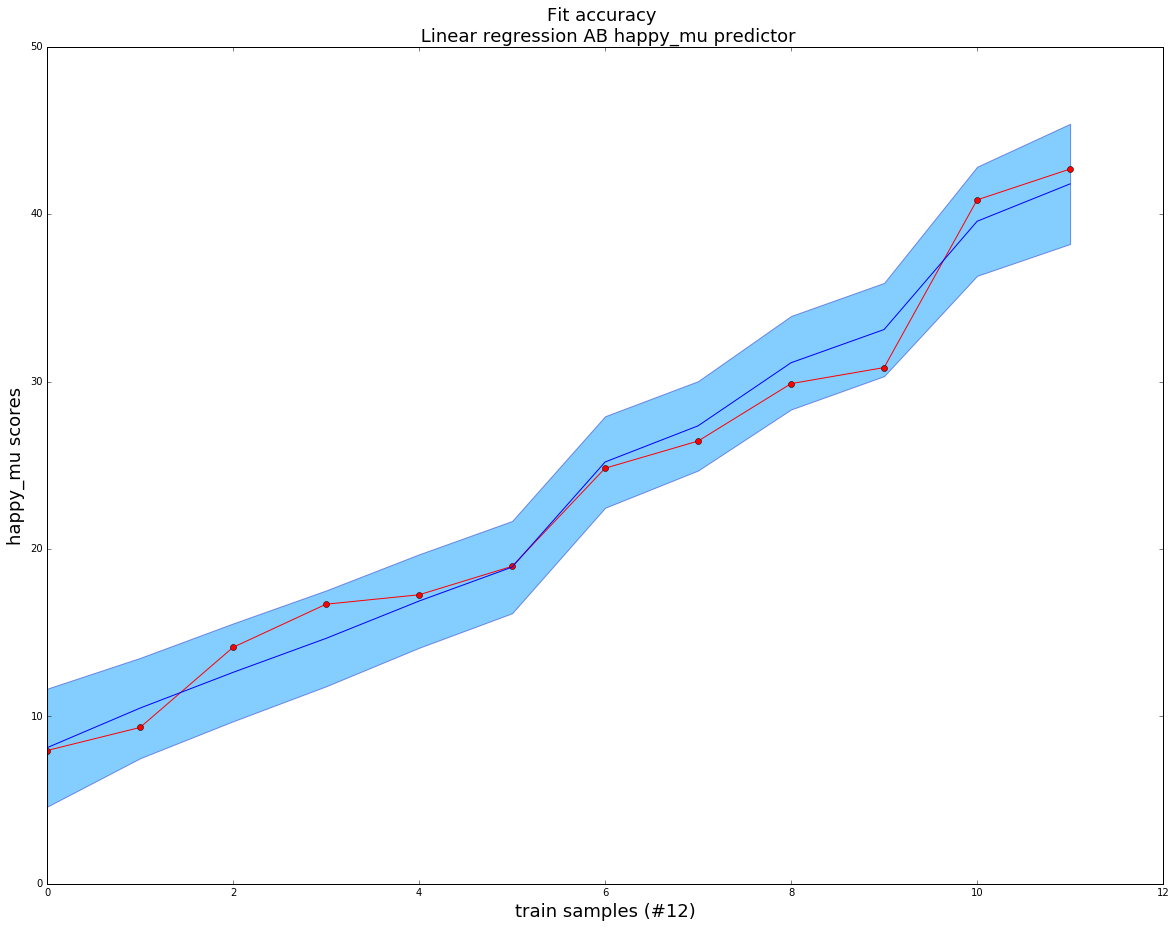

In [43]:
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_trainlrAB_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_trainlrAB_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_trainlrAB_sorted[LABEL].values-y_all_trainlrAB_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_trainlrAB_sorted[LABEL].values+y_all_trainlrAB_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_trainlrAB_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression AB ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('train samples (#'+str(y_trainAB[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

In [44]:
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = np.arange(0, y_all_trainlr_sorted[predicted_name].size, 1)
plt.errorbar(x,y_all_trainlr_sorted[predicted_name].values,fmt='r-o',label="predicted")
plt.fill_between(x, y_all_trainlr_sorted[LABEL].values-y_all_trainlr_sorted[EMOCONFIDENCE_INV[emotionid]], y_all_trainlr_sorted[LABEL].values+y_all_trainlr_sorted[EMOCONFIDENCE_INV[emotionid]],
    alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.errorbar(x,y_all_trainlr_sorted[LABEL].values,fmt='b',label="groundtruth")
#plt.title(model_dir_name,fontsize=18)
plt.title('Fit accuracy \n Linear regression ' + LABEL + ' predictor',fontsize=18)
plt.xlabel('train samples (#'+str(y_train[LABEL].size)+')',fontsize=18)
plt.ylabel(LABEL +' scores',fontsize=18)
plt.show()
# fig_name = model_dir_name + "/testPredictionHappyShaded.pdf"
# ax.savefig(fig_name) 

NameError: name 'y_all_trainlr_sorted' is not defined

In [64]:
lrAB.coef_

array([ 7.32895311, -4.9097787 ])